In [1]:
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
import rpy2.robjects as ro

import pandas as pd
import numpy as np

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


- **Import sample data**<br>
Source: https://www.eigenvector.com/data/Etch/

In [2]:
df = pd.read_csv("data/etch_data.csv", index_col = 0)
df.head()

,s4_BCl3Flow,s4_Cl2Flow,s4_RFBtmPwr,s4_RFBtmRflPwr,s4_EndptA,s4_HePress,s4_Pressure,s4_RFTuner,s4_RFLoad,s4_RFPhaseErr,s4_RFPwr,s4_RFImpedance,s4_TCPTuner,s4_TCPPhaseErr,s4_TCPImpedance,s4_TCPTopPwr,s4_TCPRflPwr,s4_TCPLoad,s4_VatValve
id,,,,,,,,,,,,,,,,,,,
1.0,751.658537,753.170732,133.780488,0.000000,1545.219512,100.682927,1186.658537,9419.731707,9067.804878,-837.463415,23.804878,16480.170732,19404.829268,-17.829268,16583.073171,349.951220,0.195122,27866.829268,49.000000
2.0,751.750000,753.113636,133.227273,0.022727,1590.681818,100.409091,1186.068182,9427.840909,9057.613636,-975.727273,23.045455,16586.181818,19404.545455,-44.318182,16562.090909,348.250000,0.227273,27883.500000,48.954545
3.0,751.511628,753.186047,133.325581,0.000000,1630.302326,100.604651,1185.906977,9427.767442,9055.953488,-1071.511628,23.046512,16541.488372,19385.069767,-16.581395,16530.651163,348.720930,0.302326,27900.418605,48.953488
4.0,751.666667,753.023810,133.166667,0.000000,1638.071429,100.547619,1185.714286,9429.000000,9055.619048,-1126.619048,23.095238,16535.214286,19383.190476,-94.357143,16571.666667,349.761905,0.261905,27863.904762,48.976190
5.0,751.674419,753.232558,133.255814,0.000000,1643.906977,100.441860,1186.116279,9438.302326,9046.767442,-940.069767,23.116279,16545.418605,19384.511628,55.883721,16601.162791,348.906977,0.162791,27870.093023,49.000000


- **Learn BN using bnlearn in R**

In [3]:
# Import r package
pandas2ri.activate()
bnlearn = importr("bnlearn")

# Hill climbing algorithm
bn_r = bnlearn.hc(df)
print(type(bn_r))

<class 'rpy2.robjects.vectors.ListVector'>


- **Convert R object to Python dictionary**

In [4]:
bn_pd = ro.conversion.rpy2py(bn_r)
bn = dict(zip(bn_pd.names, map(list,list(bn_pd))))
print(bn.keys())

dict_keys(['learning', 'nodes', 'arcs'])


- **Extract edges**

In [5]:
edges = bn['arcs']
edges = (np.asmatrix(edges).reshape(2,-1)).T.tolist()
print(f"Number of edges: {len(edges)}")   

Number of edges: 32


- **Visualization**

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

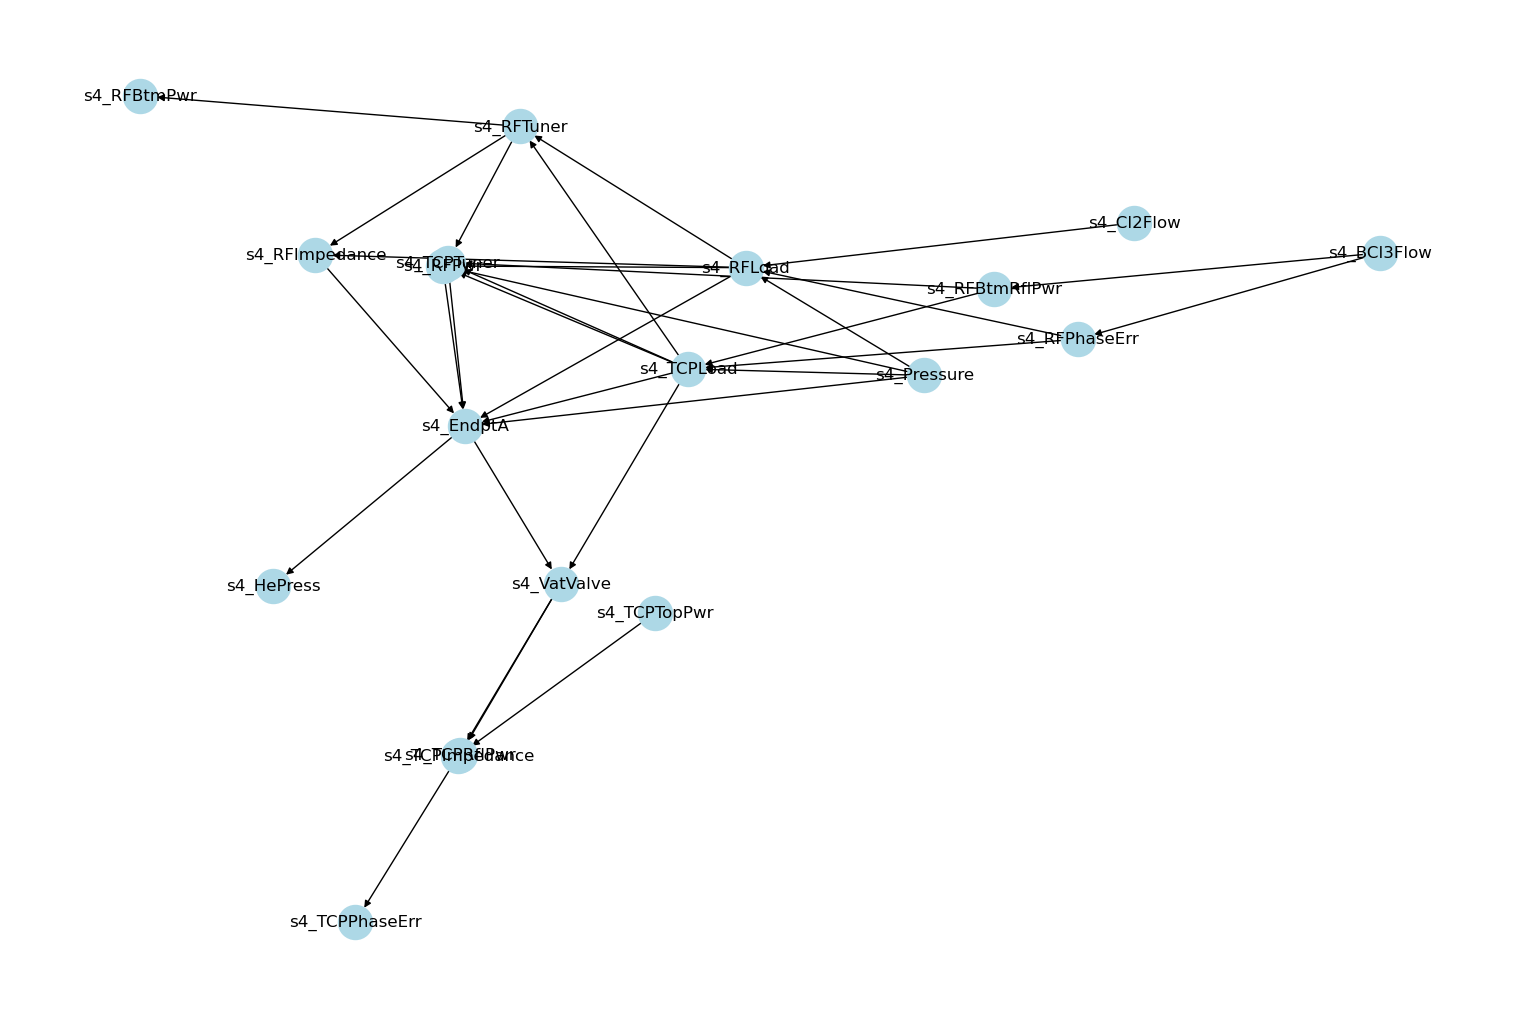

In [7]:
plt.figure(figsize = (15, 10))
g = nx.DiGraph()
g.add_nodes_from(df.columns.values)
g.add_edges_from(edges)
pos = nx.kamada_kawai_layout(g)
nx.draw(g, pos, with_labels = True, node_color='lightblue', node_size = 600)